In [54]:
import pandas as pd
csv = pd.read_csv('/content/drive/My Drive/housing.csv')
csv.sample(5)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
203,204,0.03113,0.0,4.39,0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53,17.5
329,330,0.22212,0.0,10.01,0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09,18.7
275,276,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
171,172,0.07886,80.0,4.95,0,0.411,7.148,27.7,5.1167,4,245,19.2,396.90,3.56,37.3
301,302,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6


In [55]:
data=csv.drop('ID', axis=1)
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
159,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
129,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,20.3
153,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
19,0.19802,0.0,10.59,0,0.489,6.182,42.4,3.9454,4,277,18.6,393.63,9.47,25.0
137,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0


CRIM：per capita crime rate by town

ZN：proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS：proportion of non-retail business acres per town

CHAS：Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX：nitric oxides concentration (parts per 10 million)

RM：average number of rooms per dwelling

AGE：proportion of owner-occupied units built prior to 1940

DIS：weighted distances to five Boston employment centres

RAD：index of accessibility to radial highways

TAX：full-value property-tax rate per $10,000

PTRATIO：pupil-teacher ratio by town

B：1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT：% lower status of the population

MEDV：Median value of owner-occupied homes in $1000's



In [56]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

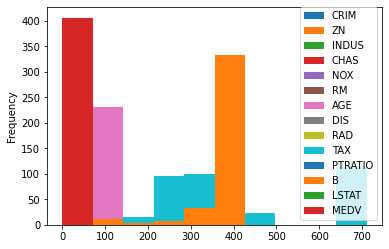

In [57]:
data.plot.hist()

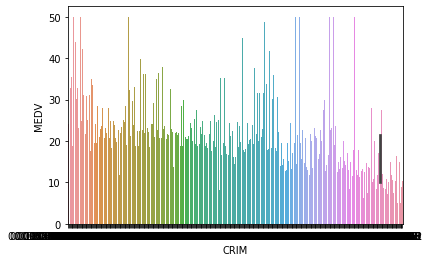

In [58]:
import seaborn as s
plot=s.barplot(x='CRIM',y='MEDV', data=data)

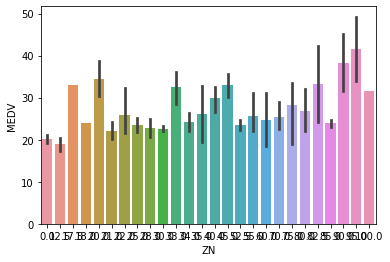

In [59]:
plot=s.barplot(x='ZN',y='MEDV', data=data)

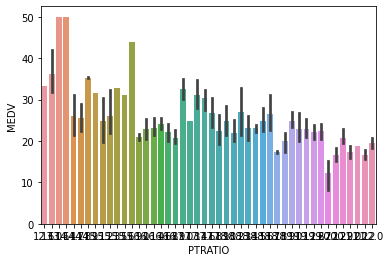

In [60]:
plot=s.barplot(x='PTRATIO',y='MEDV', data=data)

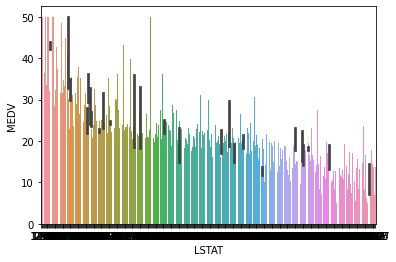

In [61]:
plot=s.barplot(x='LSTAT',y='MEDV', data=data)

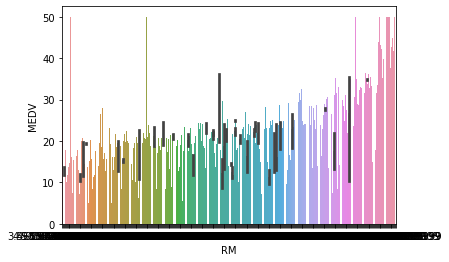

In [62]:
plot=s.barplot(x='RM',y='MEDV', data=data)

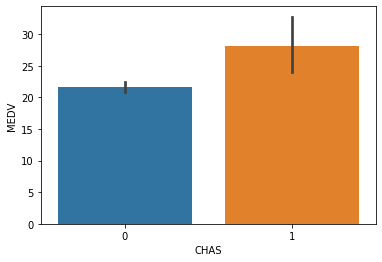

In [63]:
plot=s.barplot(x='CHAS',y='MEDV', data=data)

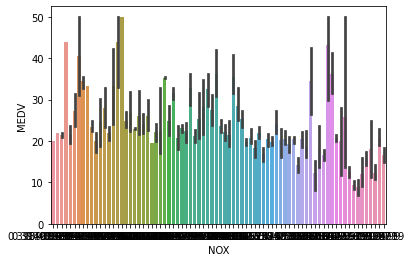

In [64]:
plot=s.barplot(x='NOX',y='MEDV', data=data)

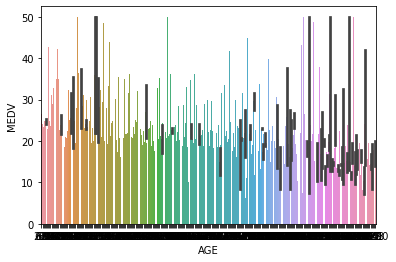

In [65]:
plot=s.barplot(x='AGE',y='MEDV', data=data)

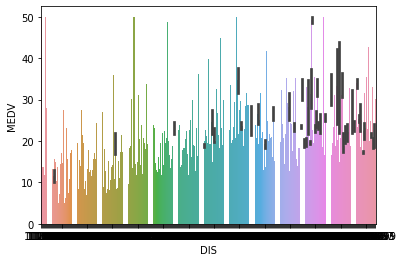

In [66]:
plot=s.barplot(x='DIS',y='MEDV', data=data)

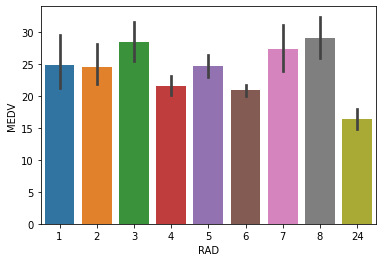

In [67]:
plot=s.barplot(x='RAD',y='MEDV', data=data)

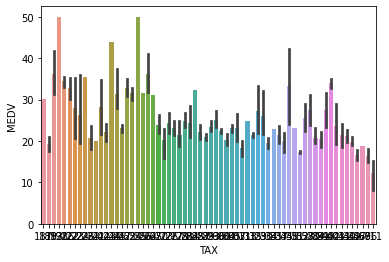

In [68]:
plot=s.barplot(x='TAX',y='MEDV', data=data)

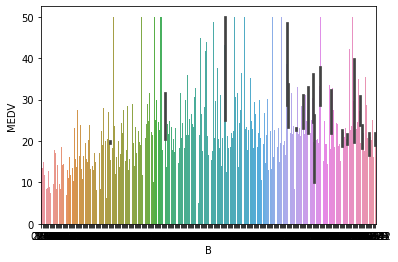

In [69]:
plot=s.barplot(x='B',y='MEDV', data=data)

In [202]:
x = data.drop(['MEDV','NOX','B','RAD','DIS'], axis = 1)
y=data['MEDV']

In [203]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts= train_test_split(x,y,test_size=0.25,random_state=1)

In [204]:
from sklearn.ensemble import RandomForestRegressor
dr= RandomForestRegressor()

In [205]:
dr.fit(x_tr,y_tr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [206]:
y_pred=dr.predict(x_ts)

In [207]:
from sklearn.metrics import accuracy_score, r2_score
r2_score(y_ts,y_pred)

0.7859976153805779

In [208]:
from sklearn.model_selection import cross_val_score
import numpy as np
score = round(np.mean(cross_val_score(dr, x_tr, y_tr, cv=5)),3) 
score

0.762

Hyper Parameter Tuning

In [210]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [212]:
rf_random = RandomizedSearchCV(estimator = dr, param_distributions =param, n_iter = 100, cv = 3)
rf_random.fit(x_tr, y_tr)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [214]:
y_pred1=rf_random.predict(x_ts)

In [215]:
r2_score(y_ts, y_pred1)

0.8066621332902932